In [199]:
#imports
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from splinter import Browser
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [200]:
import warnings
warnings.filterwarnings('ignore')

In [201]:
#prep
file_path = Path("myopia.csv")

In [202]:

df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [203]:
# assign columns
df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [204]:
df.isnull().value_counts()

AGE    SPHEQ  AL     ACD    LT     VCD    SPORTHR  READHR  COMPHR  STUDYHR  TVHR   DIOPTERHR  MOMMY  DADMY  MYOPIC
False  False  False  False  False  False  False    False   False   False    False  False      False  False  False     618
dtype: int64

In [205]:
df.shape

(618, 15)

In [206]:
df.duplicated().sum()

0

In [207]:
#81 total myopic children samples and 537 non-myopic children in file
df["MYOPIC"].value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [208]:
labels=df["MYOPIC"]

In [209]:
# Remove the "MYOPIC" column 
df = df.drop("MYOPIC", axis=1)
path=Path('myopia-CLEAN.csv')
df.to_csv(path,index=False)

In [210]:
# Create a scaler to standardize the data
scaler = StandardScaler()

In [211]:
# Train the scaler with the data
X_Scaled=scaler.fit_transform(df)
X_Scaled[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

In [212]:
# Initialize PCA paramteters
pca = PCA(n_components=0.9)

# Get the two principal elements for  iris set.
myopia_pca = pca.fit_transform(X_Scaled)

In [184]:
# Explained data variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [185]:
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [186]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=285,n_components=3,perplexity=65,verbose=1,n_iter=2900)

In [187]:
# Reduce TNSE dimensions 
tsne_features = tsne.fit_transform(myopia_pca)

[t-SNE] Computing 196 nearest neighbors...
[t-SNE] Indexed 618 samples in 0.001s...
[t-SNE] Computed neighbors for 618 samples in 0.027s...
[t-SNE] Computed conditional probabilities for sample 618 / 618
[t-SNE] Mean sigma: 1.515878
[t-SNE] KL divergence after 250 iterations with early exaggeration: 106.680443
[t-SNE] KL divergence after 2900 iterations: 2.273199


In [188]:
# The dataset has two defined columns
tsne_features.shape

(618, 3)

In [189]:
tsne_features

array([[  82.57399 ,  231.88608 ,   71.06209 ],
       [ -32.461605,  -24.506016,   39.481945],
       [-174.55986 , -287.52927 ,  -40.29528 ],
       ...,
       [  98.86266 ,  150.54283 ,   48.781555],
       [ 132.2773  , -282.21075 ,   20.291637],
       [  59.061634,   93.680275,   52.570576]], dtype=float32)

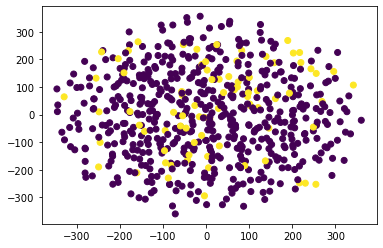

In [190]:
#plot output
plt.scatter(tsne_features[:,0], tsne_features[:,1],c=labels)
plt.show()

In [191]:
inertia = []
k = list(range(1, 14))

# Identify cluster inertia for range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


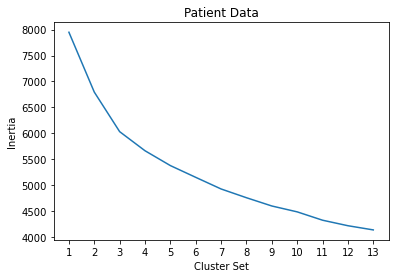

In [192]:
# Plot the elbow curve to find the candidate for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,14))
plt.xlabel('Cluster Set')
plt.ylabel('Inertia')
plt.title('Patient Data')
plt.show()

In [193]:
#Dataframe from the PCA transformed data for K-Means Modelling and plotting
columns=[]
for i in range(len(pca.components_)):
    columns.append(i+1)
pca_df=pd.DataFrame(myopia_pca,columns=columns)
pca_df['class']=km.labels_
pca_df.head()

,1,2,3,4,5,6,7,8,9,10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,3
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,10
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,11
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,3
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,8


In [194]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [195]:
clusters = get_clusters(7, pca_df)

In [196]:
def show_clusters(df):
    plt.scatter(pca_df[1], pca_df[2], c=pca_df['class'])
    plt.xlabel('PCA A1')
    plt.ylabel('PCA B2')
    plt.show()

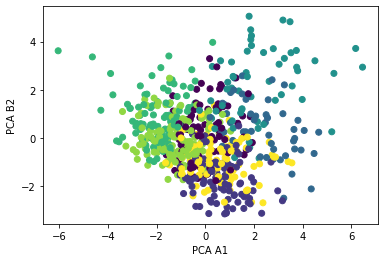

In [197]:
show_clusters(clusters)

In [198]:
#The preferred number of clusters appears to be 3 at a min. The training data set seems to small to make ideal or statistically significant indications and predictions.